In [13]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score

In [14]:
# Load the dataset from the GitHub link
url = "https://raw.githubusercontent.com/ManassehV2/SE4AS_SDN/refs/heads/master/ModelTraining/DataSet.csv"
df = pd.read_csv(url)

# Display the shape of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (225745, 6)


In [15]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Print standardized column names
print("Standardized columns:")
print(df.columns.tolist())


Standardized columns:
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag C

In [16]:
# Select relevant features and rename columns
selected_columns = {
    'Flow Duration': 'flow_duration',
    'Total Fwd Packets': 'fwd_packets',
    'Total Backward Packets': 'bwd_packets',
    'Flow Bytes/s': 'byte_rate',
    'Flow Packets/s': 'packet_rate',
    'Label': 'category'
}

data = df[list(selected_columns.keys())].rename(columns=selected_columns)

# Calculate additional features
data['byte_count'] = data['fwd_packets'] + data['bwd_packets']
data['packet_count'] = data['fwd_packets'] + data['bwd_packets']

# Drop the original fwd_packets and bwd_packets columns
data = data.drop(columns=['fwd_packets', 'bwd_packets'])

# Map labels (BENIGN -> 0, others -> 1)
data['category'] = data['category'].apply(lambda x: 0 if x == 'BENIGN' else 1)

data.head()


,flow_duration,byte_rate,packet_rate,category,byte_count,packet_count
0,3,4.000000e+06,666666.66670,0,2,2
1,109,1.100917e+05,18348.62385,0,2,2
2,52,2.307692e+05,38461.53846,0,2,2
3,34,3.529412e+05,58823.52941,0,2,2
4,3,4.000000e+06,666666.66670,0,2,2


In [17]:

# Print standardized column names
print("Standardized columns:")
print(data.columns.tolist())


Standardized columns:
['flow_duration', 'byte_rate', 'packet_rate', 'category', 'byte_count', 'packet_count']


In [18]:
data.sample(10)

,flow_duration,byte_rate,packet_rate,category,byte_count,packet_count
63436,6854854,4.376461,0.729410,1,5,5
29025,33316,349171.569200,210.109257,1,7,7
66243,78327058,148.824688,0.178738,1,14,14
138961,91709869,127.238215,0.163559,0,15,15
37600,1110387,10471.124030,8.105282,1,9,9
182617,1892655,6146.392237,4.755225,1,9,9
117730,942210,12346.504490,10.613345,1,10,10
77451,81216572,143.603697,0.172379,1,14,14
170055,640589,18150.483380,10.927443,1,7,7
139381,4003005,10.492118,1.748686,0,7,7


In [19]:
# Define features (X) and target (y)
X = data[['flow_duration', 'byte_rate', 'packet_rate', 'byte_count', 'packet_count']]
y = data['category']

# Split the dataset into training (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)


Training data size: (180596, 5)
Test data size: (45149, 5)


In [20]:
# Replace infinity or very large values with NaN
X_train = X_train.replace([float('inf'), float('-inf')], pd.NA)
X_test = X_test.replace([float('inf'), float('-inf')], pd.NA)

# Replace NaN with the mean of each column
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Ensure no infinities remain
if (X_train.isin([float('inf'), float('-inf')]).any().any()) or (X_test.isin([float('inf'), float('-inf')]).any().any()):
    raise ValueError("There are still infinity values in the dataset.")
else:
    print("Infinity values handled successfully!")


Infinity values handled successfully!


<ipython-input-20-ee72ed7e0a3f>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.fillna(X_train.mean())
<ipython-input-20-ee72ed7e0a3f>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = X_test.fillna(X_test.mean())


In [21]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


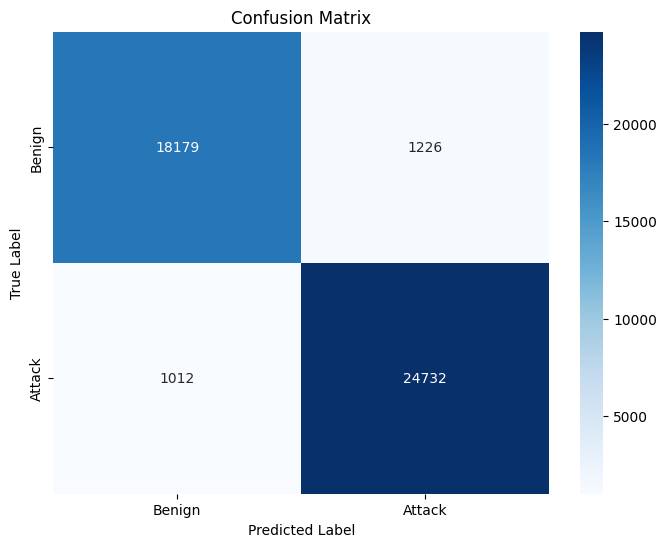


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     19405
           1       0.95      0.96      0.96     25744

    accuracy                           0.95     45149
   macro avg       0.95      0.95      0.95     45149
weighted avg       0.95      0.95      0.95     45149


Accuracy Score:
0.950430795809431


In [23]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


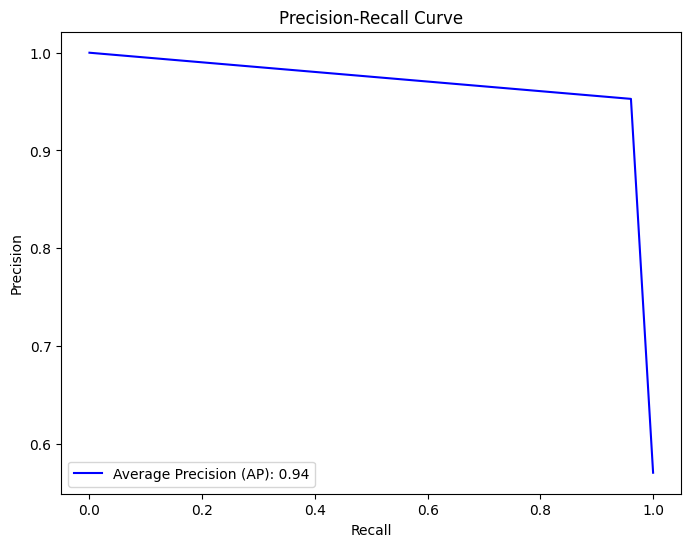

In [28]:
# Generate precision-recall curve data
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'Average Precision (AP): {average_precision:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

In [26]:
from joblib import dump

# Prepare the dictionary with the model and feature names
model_and_features = {
    'model': model,
    'features': list(X.columns)  # Save the feature names
}

# Save the dictionary as a .joblib file
dump(model_and_features, 'trained_model_with_5_features.joblib')

print("Model and features saved as 'trained_model_with_5_features.joblib'")


Model and features saved as 'trained_model_with_5_features.joblib'


In [27]:
# Save the preprocessed data
preprocessed_path = "preprocessed_CICIDS2017_5_features.csv"
data.to_csv(preprocessed_path, index=False)
